<a href="https://colab.research.google.com/github/kmayutrisna/Federated-Learning/blob/main/FLML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.utils import shuffle
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
train_df = pd.read_csv('/content/drive/My Drive/data/HumanActivity/data/train.csv')
train_df['activity'] = train_df['label'].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})


In [5]:
test_df = pd.read_csv('/content/drive/My Drive/data/HumanActivity/data/test.csv')
test_df['activity'] = test_df['label'].map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

In [6]:
x_train = train_df.drop(["subject", "label", "activity"], axis = 1)
y_train = train_df["label"]

x_test = test_df.drop(["subject", "label", "activity"], axis = 1)
y_test = test_df["label"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((528256, 9), (528256,), (263424, 9), (263424,))

In [7]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [8]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    ax = plt.gca()
    ax.set_ylim(-.5, 5.5)
        
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
from datetime import datetime
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, \
                 print_cm=True, cm_cmap=plt.cm.Reds):
    
    
    # to store results at various phases
    results = dict()
    
    # time at which model starts training 
    train_start_time = datetime.now()
    print('training the model..')
    model.fit(X_train, y_train)
    print('Done \n \n')
    train_end_time = datetime.now()
    results['training_time'] =  train_end_time - train_start_time
    print('training_time(HH:MM:SS.ms) - {}\n\n'.format(results['training_time']))
    
    
    # predict test data
    print('Predicting test data')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    print('Done \n \n')
    results['testing_time'] = test_end_time - test_start_time
    print('testing time(HH:MM:SS:ms) - {}\n\n'.format(results['testing_time']))
    results['predicted'] = y_pred
   

    # calculate overall accuracty of the model
    accuracy = metrics.accuracy_score(y_true=y_test, y_pred=y_pred)
    # store accuracy in results
    results['accuracy'] = accuracy
    print('---------------------')
    print('|      Accuracy      |')
    print('---------------------')
    print('\n    {}\n\n'.format(accuracy))
    
    
    # confusion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm: 
        print('--------------------')
        print('| Confusion Matrix |')
        print('--------------------')
        print('\n {}'.format(cm))
        
    # plot confusin matrix
    plt.figure(figsize=(8,8))
    plt.grid(b=False)
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized confusion matrix', cmap = cm_cmap)
    ax = plt.gca()
    ax.set_ylim(-.5,5.5)
    plt.show()
    
    # get classification report
    print('-------------------------')
    print('| Classifiction Report |')
    print('-------------------------')
    classification_report = metrics.classification_report(y_test, y_pred)
    # store report in results
    results['classification_report'] = classification_report
    print(classification_report)
    
    # add the trained  model to the results
    results['model'] = model
    
    return results

In [10]:
def print_grid_search_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))

In [11]:
from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

training the model..
Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  4.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Done 
 

training_time(HH:MM:SS.ms) - 0:05:13.814321


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.030410


---------------------
|      Accuracy      |
---------------------

    0.5330721574344023


--------------------
| Confusion Matrix |
--------------------

 [[12820  6312   101  2025 23414     0]
 [ 9821 21583   454    10  9220     0]
 [11231  5505  2004  5385 14784     3]
 [ 2405   604    18 34419  6074     0]
 [10097  4827    88  9799 22549     0]
 [    0   823     0     0     0 47049]]


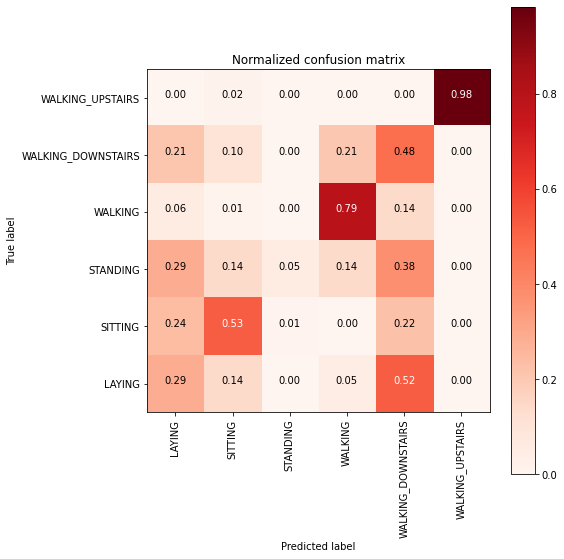

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.28      0.29      0.28     44672
           2       0.54      0.53      0.53     41088
           3       0.75      0.05      0.10     38912
           4       0.67      0.79      0.72     43520
           5       0.30      0.48      0.37     47360
           6       1.00      0.98      0.99     47872

    accuracy                           0.53    263424
   macro avg       0.59      0.52      0.50    263424
weighted avg       0.59      0.53      0.51    263424



In [12]:
# start Grid search
parameters = {'C':[0.01, 0.1, 1, 10, 20, 30], 'penalty':['l2','l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results =  perform_model(log_reg_grid, x_train, y_train, x_test, y_test, class_labels=labels)

training the model..
Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  9.0min finished


Done 
 

training_time(HH:MM:SS.ms) - 0:09:00.957027


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:01:35.951146


---------------------
|      Accuracy      |
---------------------

    0.72915148202138


--------------------
| Confusion Matrix |
--------------------

 [[31114  5460  6840   358   900     0]
 [ 9868 26511  4367    96   246     0]
 [11635  3930 22815   233   299     0]
 [  149    11    73 33759  9528     0]
 [  677   108   201 11626 34748     0]
 [ 4258   478     7     0     0 43129]]


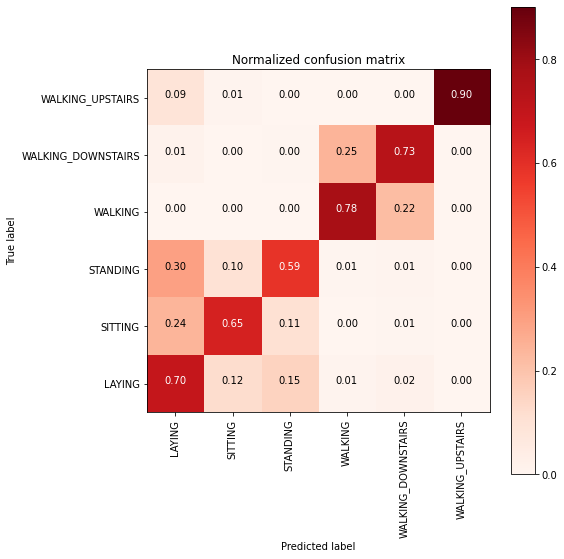

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.54      0.70      0.61     44672
           2       0.73      0.65      0.68     41088
           3       0.67      0.59      0.62     38912
           4       0.73      0.78      0.75     43520
           5       0.76      0.73      0.75     47360
           6       1.00      0.90      0.95     47872

    accuracy                           0.73    263424
   macro avg       0.74      0.72      0.73    263424
weighted avg       0.74      0.73      0.73    263424



In [13]:
from sklearn.neighbors import KNeighborsClassifier

#knn
# start Grid search
parameters = {'n_neighbors': [1, 10, 11, 20, 30]}
log_knn = KNeighborsClassifier(n_neighbors=6)

log_knn_grid = GridSearchCV(log_knn, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_knn_grid_results =  perform_model(log_knn_grid, x_train, y_train, x_test, y_test, class_labels=labels)

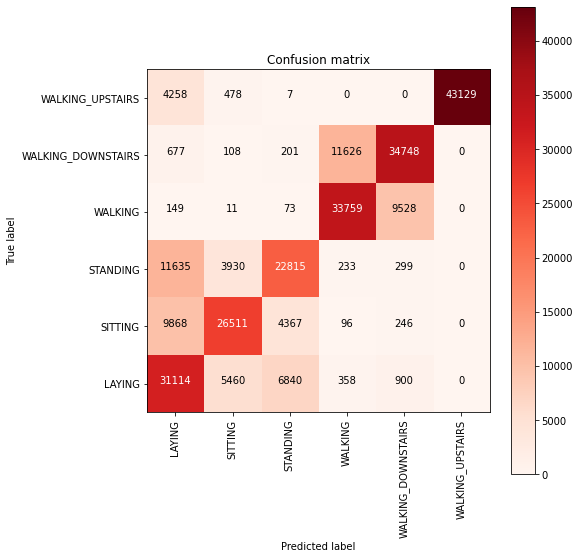

In [14]:
plt.figure(figsize=(8,8))
plt.grid(b=False)
plot_confusion_matrix(log_knn_grid_results['confusion_matrix'], classes=labels, cmap=plt.cm.Reds, )

plt.show()

In [15]:
# observe the attributes of the model 
print_grid_search_attributes(log_knn_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'n_neighbors': 30}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.7849319396358118



In [16]:
from sklearn.svm import LinearSVC

training the model..
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 96.8min finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Done 
 

training_time(HH:MM:SS.ms) - 1:43:41.146814


Predicting test data
Done 
 

testing time(HH:MM:SS:ms) - 0:00:00.031657


---------------------
|      Accuracy      |
---------------------

    0.5550139698736638


--------------------
| Confusion Matrix |
--------------------

 [[13965  5344     0  3995 21368     0]
 [ 4487 25099    71    76 11355     0]
 [11882  6484   574  8103 11869     0]
 [   85  1803    14 37163  4455     0]
 [ 8022  4958    13 12836 21531     0]
 [    0     0     0     0     0 47872]]


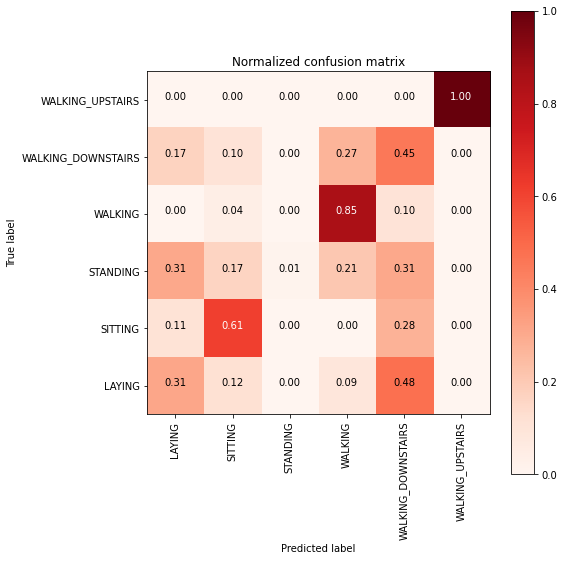

-------------------------
| Classifiction Report |
-------------------------
              precision    recall  f1-score   support

           1       0.36      0.31      0.34     44672
           2       0.57      0.61      0.59     41088
           3       0.85      0.01      0.03     38912
           4       0.60      0.85      0.70     43520
           5       0.31      0.45      0.37     47360
           6       1.00      1.00      1.00     47872

    accuracy                           0.56    263424
   macro avg       0.62      0.54      0.50    263424
weighted avg       0.61      0.56      0.52    263424



In [17]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [18]:
print_grid_search_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=5e-05,
          verbose=0)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.5922486914053348



In [ ]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

training the model..
